# A Basic Jupyter Notebook

Notebooks embrace the _literate programming_ paradigm by providing a 
way for researchers to combine narrative explanation with executable code
and results (as data, tables, images and visualizations).

4/14/2020 cgates


- [Classic Notebook Functionality](#Classic-Notebook-Functionality)
  - [Markdown is supported](#Markdown-is-supported)
- [Jupyter Architecture](#Jupyter-Architecture)
- [Auto save as HTML](#Auto-save-as-HTML)
- [Tunnelling from the comps](#Tunnelling-from-the-comps)
- [Refs](#Refs)

## Classic Notebook Functionality

In [1]:
# simple python expressions
2 + 2

4

In [2]:
# pandas supports dataframes
import pandas as pd
df = pd.read_csv('file_types/iris.csv')
print(df.shape)
df.head()

(150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


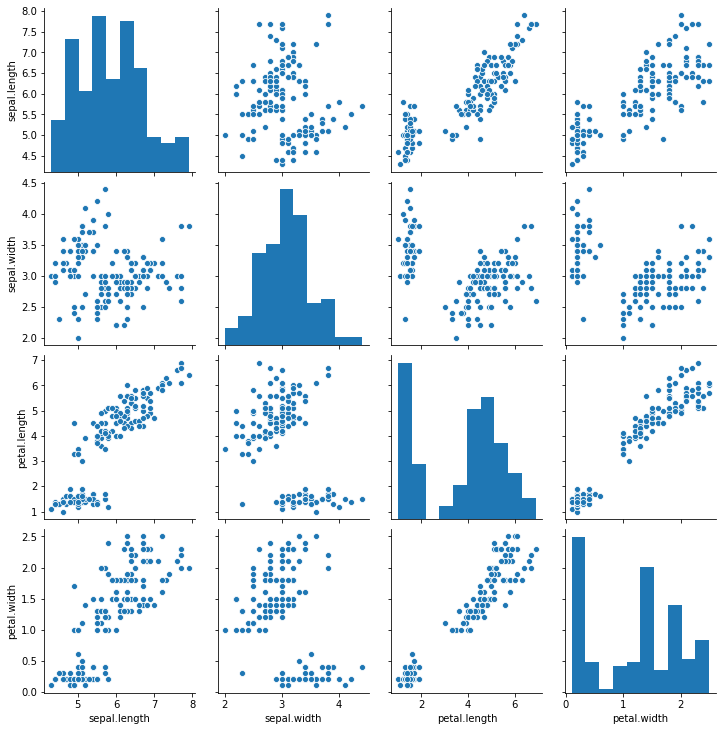

In [3]:
#this tells the notebook to put the plots inline as opposed to launching a separate window
%matplotlib inline 

# Seaborn supports more advanced plotting
import seaborn as sns
sns.pairplot(df)

<a name="Markdown-is-supported"></a>

#### Markdown is supported

*bold* and _italic_

1. Make America Great
2. Put education first

Or $\LaTeX$
$$e^{i\pi} - 1 =0$$

In [4]:
# This is an interactive "widget" (also illustrates how to import shared code)
from ipywidgets import interactive, fixed
from lorenz import solve_lorenz
w=interactive(solve_lorenz,sigma=(0.0,50.0),rho=(0.0,50.0))
w

interactive(children=(FloatSlider(value=10.0, description='sigma', max=50.0), FloatSlider(value=2.666666666666…

In [5]:
# by prefixing with "!", you can execute Bash commands 
!ls

BasicJupyerNotebook.html  Untitled.html             images
BasicJupyerNotebook.ipynb __pycache__               lorenz.ipynb
HelloWorld.md             file_types                lorenz.py


In [6]:
!ls file_types

hi_there.fasta iris.csv       iris.tsv       words.csv      words.tsv


In [7]:
!head file_types/iris.csv

"sepal.length","sepal.width","petal.length","petal.width","variety"
5.1,3.5,1.4,.2,"Setosa"
4.9,3,1.4,.2,"Setosa"
4.7,3.2,1.3,.2,"Setosa"
4.6,3.1,1.5,.2,"Setosa"
5,3.6,1.4,.2,"Setosa"
5.4,3.9,1.7,.4,"Setosa"
4.6,3.4,1.4,.3,"Setosa"
5,3.4,1.5,.2,"Setosa"
4.4,2.9,1.4,.2,"Setosa"


----

# Jupyter Architecture

- The notebook server mediates interactions between the user (via browser), the notebook file, and the kernel.

![](images/jupyter_architecture1.png)

- The standards for connecting the server to the kernel are well defined reasonably simple; consequently, there are many supported kernels beyond Julia, Python, and R (hence JuPYteR).
  - https://github.com/jupyter/jupyter/wiki/Jupyter-kernels

----

### Problems
1. No way to manage multiple notebooks.
2. No stateful workspace.
3. No safe way to extend UI.

This is what inspired folks to create Jupyter Lab.

---

A couple of extensions I referenced in the talk:
- https://github.com/lckr/jupyterlab-variableInspector
- https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/fasta-extension

If you want the ability to export as PDF, you will need to download and install MacTeX (then you need to restart the terminal session and relaunch jupyter lab).
- http://tug.org/mactex/mactex-download.html

---

<a name="Auto-save-as-HTML"></a>

### Auto-save as HTML

Here is a nifty technique that will automagically save your ipynb as an html file. It operates on the notebook 
itself, so it works with classic Jupyter Notebook and Jupyter Lab
- https://jupyter-notebook.readthedocs.io/en/stable/extending/savehooks.html
    
In short you have to edit a jupyter config file. Find the file with:
```jupyter --config-dir```
or create one if necessary:
```jupyter notebook --generate-config```

Add this to the top of the config file
```
c = get_config()
### If you want to auto-save .html (and .py) versions of your notebook:
# modified from: https://github.com/ipython/ipython/issues/8009
import os
from subprocess import check_call

def post_save(model, os_path, contents_manager):
    """post-save hook for converting notebooks to .py scripts"""
    if model['type'] != 'notebook':
        return # only do this for notebooks
    d, fname = os.path.split(os_path)
    #check_call(['jupyter', 'nbconvert', '--to', 'script', fname], cwd=d)
    check_call(['jupyter', 'nbconvert', '--to', 'html', fname], cwd=d)

c.FileContentsManager.post_save_hook = post_save
```
---

<a name="Tunnelling-from-the-comps"></a>

### Tunnelling from the comps

If you would like to run the server on the cluster and access remotely, you can use ssh tunnelling like so:
    
##### Launch Jupyter Lab on compX
- Navigate to a suitable dir, and start a screen session (optional, but nice).
- `$ conda activate jupyterlab; jupyter lab`
- Look for this last passage at the end of the terminal log:

```Copy/paste this URL into your browser when you connect for the first time,
   to login with a token:
   http://localhost:9090/?token=c88a403a402a76abd0a7af3090be189f24a2184524e18d2c
```

- Copy the URL above and note the port number (`9090` in the example above; your port 
number will be different)    

##### Setup a tunnel on you laptop

- On your laptop, launch a terminal window
- Substitue the port above in this command and execute. (Make sure you replace both instances of 
the port in the command below and also make sure the final argument is the comp you logged into above.)

   ```$ ssh -v -N -L9090:localhost:9090 bfx-compX```

You may be challenged for a user/password to connect to bfx-compX; public/private key will be used 
if available.
- This window can be minimized. You can close this window when you are done with the tunnel. If the 
tunnel is broken (because you drop off VPN or computer sleeps), you can re-execute the command above.
- _You may consider this alternative form of the tunnel command:_

   ```$ ssh -v -N -L9090:localhost:9090 bfx-compX```

   This puts the ssh tunnel into the background and out of the way, but you may need to clear out the 
   ssh process manually when you are done:

    ```$ ps x  | grep ssh
    ...
    71600   ??  Ss     0:00.00 ssh -f -N -L9090:localhost:9090 bfx-comp5
    ...
    $ kill 71600 # whatever PID you identified from above```

Finally, paste the URL you copied above into your browser.


##### Note that ARC has some ability to do something similar on GL interactive nodes through here:
- https://greatlakes.arc-ts.umich.edu/pun/sys/dashboard/batch_connect/sessions

---

<a name="Refs"></a>

### Refs

- https://en.wikipedia.org/wiki/Literate_programming
- https://jupyterlab.readthedocs.io/en/stable/
- https://jupyter.readthedocs.io/en/latest/architecture/how_jupyter_ipython_work.html
- https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd
- https://www.oreilly.com/content/jupyterlab-the-evolution-of-the-jupyter-web-interface/
- https://towardsdatascience.com/jupyterlab-a-next-gen-python-data-science-ide-562d216b023d
- https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks
- A pythonic alternative to Rmd:  
  https://github.com/gpoore/codebraid
- A very thoughtful comparison of notebooks vs Rmd:  
  https://yihui.org/en/2018/09/notebook-war/#things-joel-likes-about-notebooks
- A simple TravisCI approach to automate a test that your notebook executes. 
  https://github.com/ghego/travis_anaconda_jupyter